### **Tema 2: Procesamiento de imágenes digitales. Operaciones aritméticas y lógicas** 


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### **Operaciones aritméticas**

En este apartado vamos a aprender qué ocurre con las operaciones aritméticas de numpy y OpenCV cuando hay desbordamiento en el rango de valores posibles en el tipo base del np.array que representa la imagen.



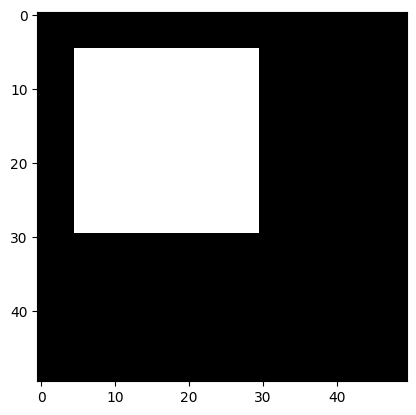

In [3]:
# Creamos una imagen con fondo negro y un cuadrado blanco en un lado.
imgA = np.zeros((50,50), dtype = np.uint8) # Crear matrices con valores a cero
imgA[5:30,5:30] = 255 # Asignar valores a rangos de matrices

plt.imshow(imgA, cmap="gray")

Ahora vamos a aplicar diferentes operaciones artiméticas, tanto desde numpy (aplicando los operadores sobrecargados /, +, *) como los de OpenCV.

(imgA / 2).dtype = float64
np.uint8(imgA/2).dtype = uint8
imgB.min() = 0
imgB.max() = 127


Text(0.5, 1.0, 'imgA/2')

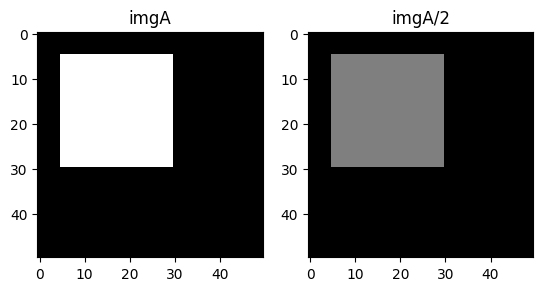

In [10]:
# División entre 2 de los valores de gris de la imagen anterios
imgB = imgA / 2 # Al aplicar la división automáticamente numpy nos devuelve una imagen con dtype=np.float64 (máxima precisión)
print("(imgA / 2).dtype =", imgB.dtype)
imgB = np.uint8(imgB) # Devolvemos la matriz al tipo np.uint8, el de una imagen en niveles de gris
print("np.uint8(imgA/2).dtype =", imgB.dtype)
print("imgB.min() =", imgB.min())
print("imgB.max() =",imgB.max())

plt.subplot(1, 2, 1)
plt.imshow(imgA, cmap="gray", vmin = 0, vmax = 255)
plt.title("imgA")
plt.subplot(1, 2, 2)
plt.imshow(imgB, cmap="gray", vmin = 0, vmax = 255)
plt.title("imgA/2")

(imgA + 64).dtype = uint8
np.uint8(imgC + 64).dtype = uint8
imgC.min() = 9
imgC.max() = 10


Text(0.5, 1.0, 'imgA+64')

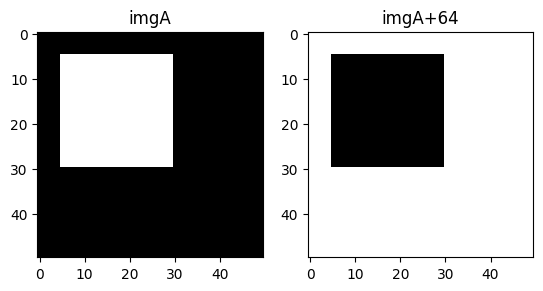

In [16]:
# Suma de un escalar, + 64, a todos los niveles de gris de imgA
imgC = np.uint8(imgA + 64)

imgC = imgA + 64 # Aquí no se cambia el tipo numérico, sigue siendo np.uint8. 
# ¡Pero tenemos un problema! Por el rango de representación de los enteros sin 
# signo de 8 bits, tenemos que 0 + 64 = 64 y ¡255 + 64 = 63! El desbordamiento 
# de la representación hace que esta se de la vuelta (del 255 al 0 y del 0 al 255)

print("(imgA + 64).dtype =", imgC.dtype)
imgC = np.uint8(imgC) # Devolvemos la matriz al tipo np.uint8, el de una imagen en niveles de gris
print("np.uint8(imgC + 64).dtype =", imgC.dtype)
print("imgC.min() =", imgC.min())
print("imgC.max() =",imgC.max())

plt.subplot(1, 2, 1)
plt.imshow(imgA, cmap="gray")
plt.title("imgA")
plt.subplot(1, 2, 2)
plt.imshow(imgC, cmap="gray")
plt.title("imgA+64")

imgA.min() = 0
imgA.max() = 255
imgD.min() = 64.0
imgD.max() = 319.0


Text(0.5, 1.0, 'imgA+64')

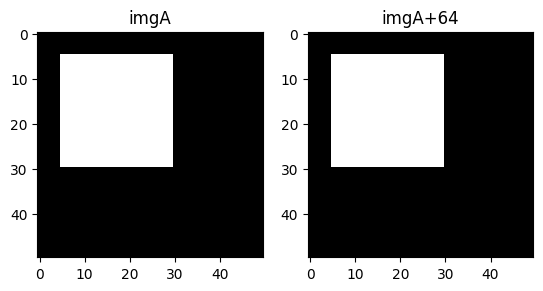

In [6]:
# Una manera más razonable para tratar las operaciones aritméticas entre imágenes,
# es saturar al valor más grande o más pequeño: 255 + 10 => 255 y 0 - 3 => 0

# Para ello tenemos que primero operar en un tipo base de datos que no desborde
# para la operación que queremos hacer (p.ej float64 o uint16)
imgD = np.float64(imgA) + 64
print("imgA.min() =", imgA.min())
print("imgA.max() =", imgA.max())
print("imgD.min() =", imgD.min())
print("imgD.max() =", imgD.max())

# A continuación aplicamos las reglas ante el desbordamiento
imgD[imgD>255] = 255 # cualquier píxel con valor >255 se le asigna 255
imgD[imgD<0] = 0 # cualquier píxel con valor <255 se le asigna 255

# Y por último volvemos al tipo de datos en el que queremos el resultado.
imgD = np.uint8(imgD)

plt.subplot(1, 2, 1)
plt.imshow(imgA, cmap="gray")
plt.title("imgA")
plt.subplot(1, 2, 2)
plt.imshow(imgD, cmap="gray")
plt.title("imgA+64")

Text(0.5, 1.0, 'imgA+64')

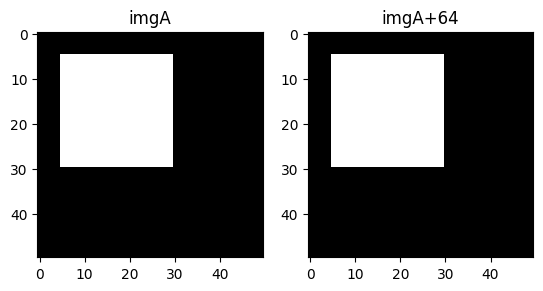

In [17]:
# Aunque numpy con sus operadores aritmético sobrecargados para la clase np.array
# son muy cómodos tienen el "problema" de la aritmética "rotativa" para las
# operaciones aritméticas con enteros sin signo que hemos visto. Así que nosotros
# tendremos que tratar con ella en el código si lo que queremos es aritmetica 
# con saturación al valor más grande del rango o al más pequeño.

# Como OpenCV está pensada para el procesamiento de imágenes, sus operaciones 
# aritméticas (add, substract, multiply, divide, ...) con imágenes ya viene con 
# la "saturación" incorporada ante el desbordamiento. Lo malo es que perdemos 
# la legibilidad que aporta la sobrecarga de operadores aritméticos.
imgE = cv2.add(imgA, 64)

plt.subplot(1, 2, 1)
plt.imshow(imgA, cmap="gray")
plt.title("imgA")
plt.subplot(1, 2, 2)
plt.imshow(imgE, cmap="gray")
plt.title("imgA+64")

### **Operaciones lógicas**


Vamos a ver qué ocurre cuando tenemos dos imágenes con valores en el conjunto {0, 255} y aplicamos diferentes operaciones lógicas entre ellas. Esto puede ser útil cuando queremos generar máscaras con los píxeles que cumplen cierta condición (p.ej. "son rojos") y combinar la máscara con los que cumplen otra condición (p.ej. "son azules").

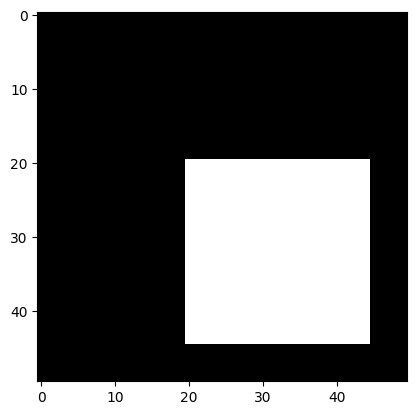

In [18]:
imgB = np.zeros((50,50),dtype=np.uint8)
imgB[20:45,20:45] = 255

plt.imshow(imgB, cmap="gray")

imgAorB.min()= 0
imgAorB.max()= 255
imgAorB.dtype= uint8


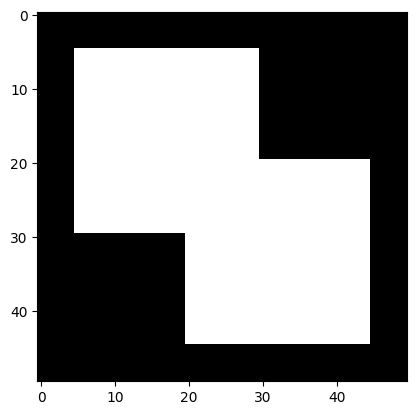

In [19]:
# Or lógico píxel a píxel entre imágenes con valores en el conjunto {0, 255}
imgAorB = imgA | imgB

print("imgAorB.min()=", imgAorB.min())
print("imgAorB.max()=", imgAorB.max())
print("imgAorB.dtype=", imgAorB.dtype)
plt.imshow(imgAorB, cmap="gray")

imgAplusB.min()= 0
imgAplusB.max()= 255
imgAplusB.dtype= uint8


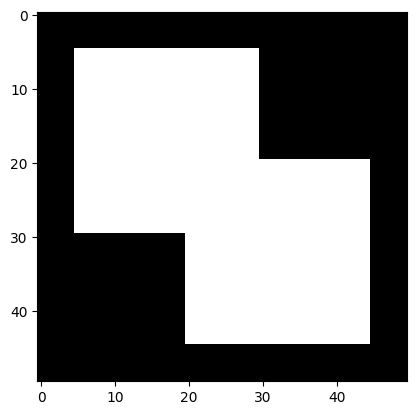

In [21]:
# Si sumamos dos imágenes (píxel a píxel) con valores en el 
# conjunto {0, 255}, teniendo en cuenta el posible desbordamiento aritmético, 
# obtenemos mismo resultado que el or lógico
imgAplusB = cv2.add(imgA, imgB)

print("imgAplusB.min()=", imgAplusB.min())
print("imgAplusB.max()=", imgAplusB.max())
print("imgAplusB.dtype=", imgAplusB.dtype)
plt.imshow(imgAplusB, cmap="gray")

imgAandB.min()= 0
imgAandB.max()= 255
imgAandB.dtype= uint8


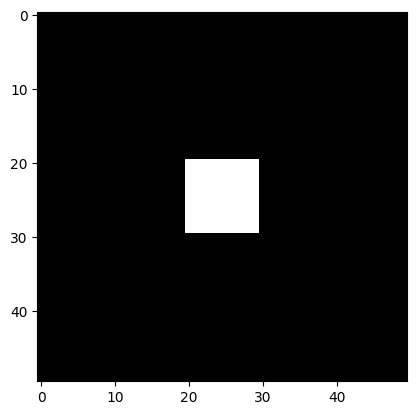

In [22]:
# And lógico píxel a píxel entre imágenes con valores en el conjunto {0, 255}
imgAandB = imgA & imgB

print("imgAandB.min()=", imgAandB.min())
print("imgAandB.max()=", imgAandB.max())
print("imgAandB.dtype=", imgAandB.dtype)
plt.imshow(imgAandB, cmap="gray")

imgAtimesB.min()= 0
imgAtimesB.max()= 255
imgAtimesB.dtype= uint8


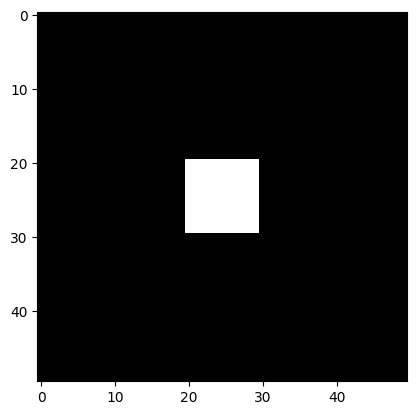

In [25]:
# Si multiplicamos dos imágenes (píxel a píxel) con valores en el 
# conjunto {0, 255}, teniendo en cuenta el posible desbordamiento aritmético, 
# obtenemos mismo resultado que el and lógico
imgAtimesB = cv2.multiply(imgA, imgB)

print("imgAtimesB.min()=", imgAtimesB.min())
print("imgAtimesB.max()=", imgAtimesB.max())
print("imgAtimesB.dtype=", imgAtimesB.dtype)
plt.imshow(imgAtimesB, cmap="gray")

Text(0.5, 1.0, 'imgA - imgB')

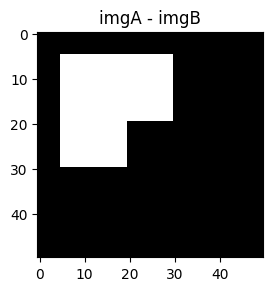

In [26]:
# Si restamos la imagen B a la A (píxel a píxel) con valores conjunto {0, 255}, 
# teniendo en cuenta el posible desbordamiento aritmético, obtenemos el 
# resultado "imgA and (not imgB)"
imgAminusB = cv2.subtract(imgA, imgB)

plt.subplot(1, 2, 1)
plt.imshow(imgAminusB, cmap="gray")
plt.title("imgA - imgB")

### **Algunos usos de operaciones aritméticas**


Restar dos imágenes consecutivas de un vídeo para detectar movimiento (en realidad zonas de cambio en las imágenes). Para ello se asume que la cámara se encuentra estática entre una imagen y otra. Este algoritmo básico es el que realizan algunas cámaras de seguridad de bajo coste.

¡detectado movimiento!


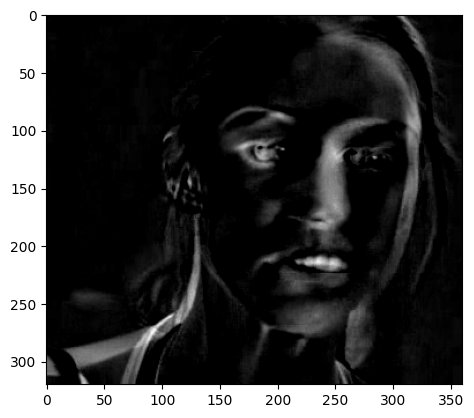

In [30]:
img1 = cv2.imread("./src/cara1.png", 0) # cargamos en niveles de gris
img2 = cv2.imread("./src/cara2.png", 0) # cargamos en niveles de gris

diff = cv2.subtract(img1, img2)
plt.imshow(diff, cmap="gray")

if np.any(diff>0):
  print("¡detectado movimiento!")

\

Si calculamos la media de imágenes registradas (alineadas perfectamente) que presentan ruido gaussiano podemos atenuar el ruido. Si el proceso que ha sufrido la imagen es equivalente a añadir un número muestreado de una distribución de probabilidad Normal (o Gaussiana) de media 0 a cada valor de color de la imagen (ver transparencias de clase), entonces realizar la media de las mismas permitirá eliminar el ruido.

Text(0.5, 1.0, 'Imagen media')

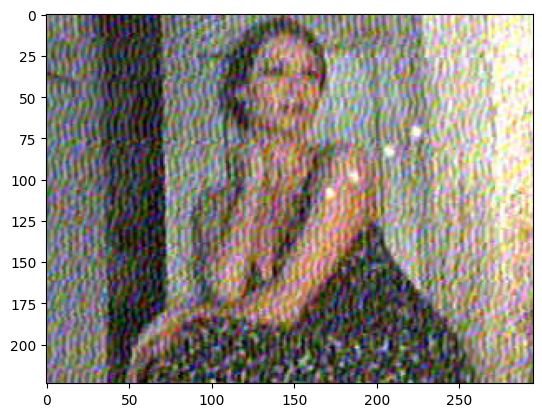

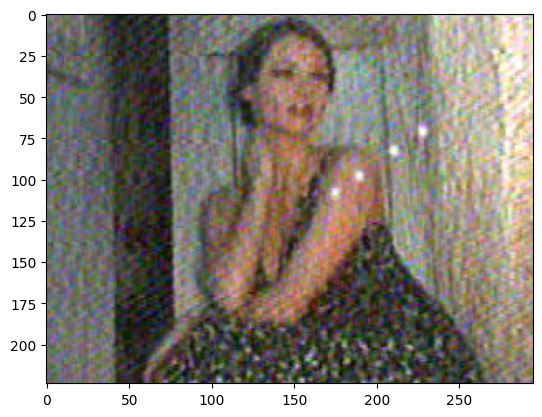

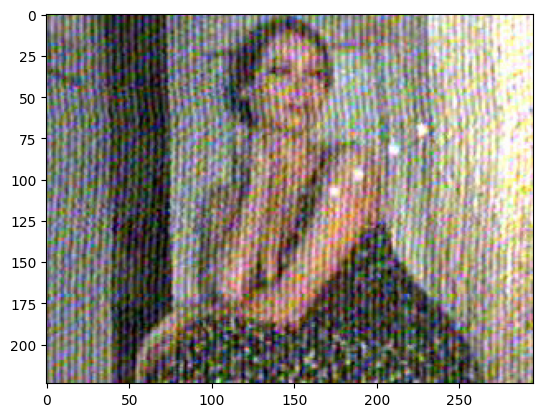

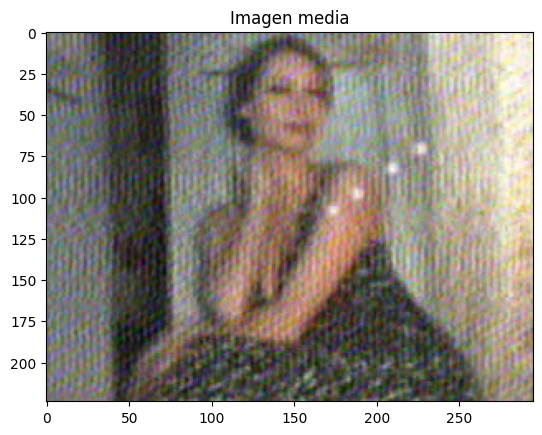

In [31]:
img1 = cv2.imread("./src/frame1.png")
img2 = cv2.imread("./src/frame2.png")
img3 = cv2.imread("./src/frame3.png")

# Ajustamos los tamaños para que todos sean iguales y podamos 
# sumar las imágenes directamente. Aquí se ha hecho un "hack"
# cuando en realidad habría que hacer un proceso correcto de alineación de 
# las imágenes
img1 = img1[0:img3.shape[0], 0:img1.shape[1], :]
img2 = img2[0:img3.shape[0], 0:img1.shape[1], :]
img3 = img3[0:img3.shape[0], 0:img1.shape[1], :]

# Calculamos la imagen con la media de cada pixel en BGR. El resultado no será
# perfecto porque tenemos pocas imágenes con las que calcular la media.
img_media = np.zeros(img1.shape, dtype=np.float32)
img_media += img1
img_media += img2
img_media += img3
img_media /= 3

img_media = np.uint8(img_media)

plt.figure()
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

plt.figure()
plt.imshow(cv2.cvtColor(img_media, cv2.COLOR_BGR2RGB))
plt.title("Imagen media")
